In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Data/final_dataset.csv")
df.head()

,CountryCode,CountryName,TourismEmploymentPer1000,FoodEmploymentPer1000,TourismGDPPercentage,BusinessToPersonalRatio,AverageStayDays,InboundArrivalsPer1000,DomesticTouristsPer1000,InboundToOutboundRatio,...,PollutionIndex,QualityOfLifeIndex,ClimateIndex,TrafficIndex,TrafficTimeIndexMinutes,TrafficInefficiencyIndex,ReverseTrafficInefficiencyIndex,ReverseTrafficTimeIndexMinutes,ReverseTrafficIndex,ReversePollutionIndex
0,ALB,Albania,15.608840,NaN,NaN,0.021680,2.562741,1793.802738,NaN,NaN,...,77.0,104.3,86.4,114.7,36.7,105.7,341.6,28.6,220.2,16.7
1,DZA,Algeria,7.411779,NaN,1.129921,1.764563,1.621484,NaN,NaN,NaN,...,63.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8
2,AGO,Angola,2.439200,0.710283,NaN,0.111823,4.000000,2.001969,NaN,6.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,28.270541,11.444930,1.890788,0.140625,2.552286,16.460292,645.361734,0.420933,...,50.8,118.0,98.3,175.4,43.8,190.9,256.4,21.5,159.5,42.9
4,AUS,Australia,21.464763,7.825559,1.572674,0.280377,2.216665,247.324185,3157.386095,NaN,...,26.8,192.2,93.8,163.0,37.4,237.8,209.5,27.9,171.9,66.9


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

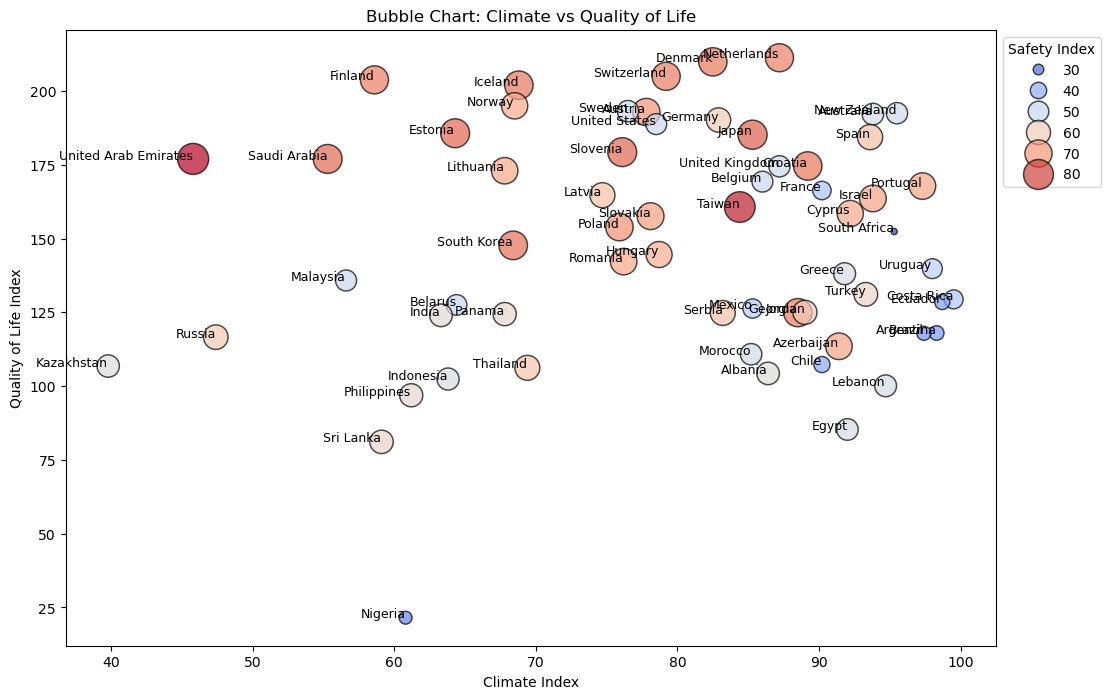

In [6]:
df_clean = df[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex', 'SafetyIndex']].dropna()

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=df_clean['ClimateIndex'],
    y=df_clean['QualityOfLifeIndex'],
    size=df_clean['SafetyIndex'],
    sizes=(20, 500),
    hue=df_clean['SafetyIndex'],
    palette="coolwarm",
    alpha=0.7,
    edgecolor="black"
)

for i, row in df_clean.iterrows():
    plt.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=9, ha='right')

plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Bubble Chart: Climate vs Quality of Life")
plt.legend(title="Safety Index", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()



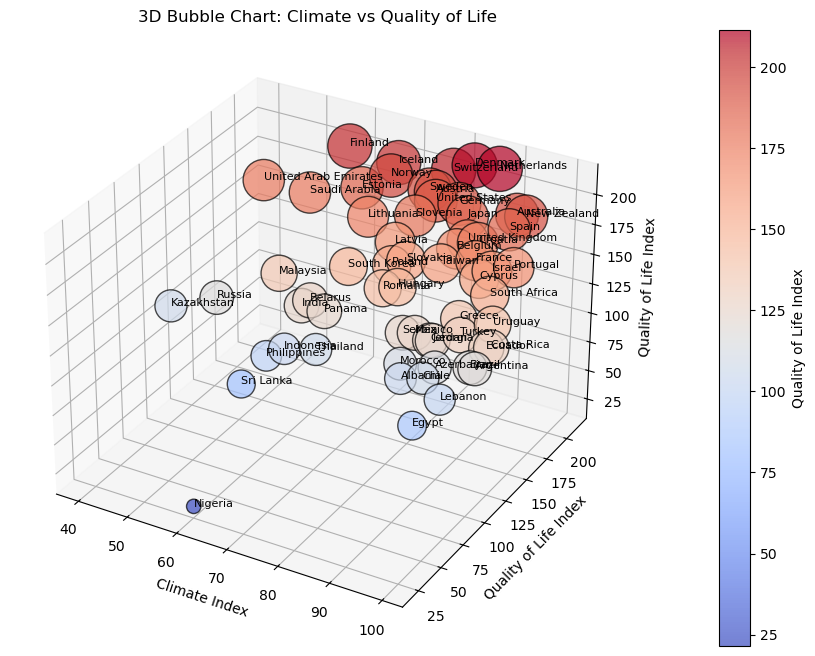

In [9]:
from mpl_toolkits.mplot3d import Axes3D

df_clean = df[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex']].dropna()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_clean['ClimateIndex'],
    df_clean['QualityOfLifeIndex'],
    df_clean['QualityOfLifeIndex'],  
    s=df_clean['QualityOfLifeIndex'] * 5,
    c=df_clean['QualityOfLifeIndex'],
    cmap="coolwarm",
    alpha=0.7,
    edgecolor="black"
)

for i, row in df_clean.iterrows():
    ax.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=8)

ax.set_xlabel("Climate Index")
ax.set_ylabel("Quality of Life Index")
ax.set_zlabel("Quality of Life Index")
ax.set_title("3D Bubble Chart: Climate vs Quality of Life")

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Quality of Life Index")

plt.show()


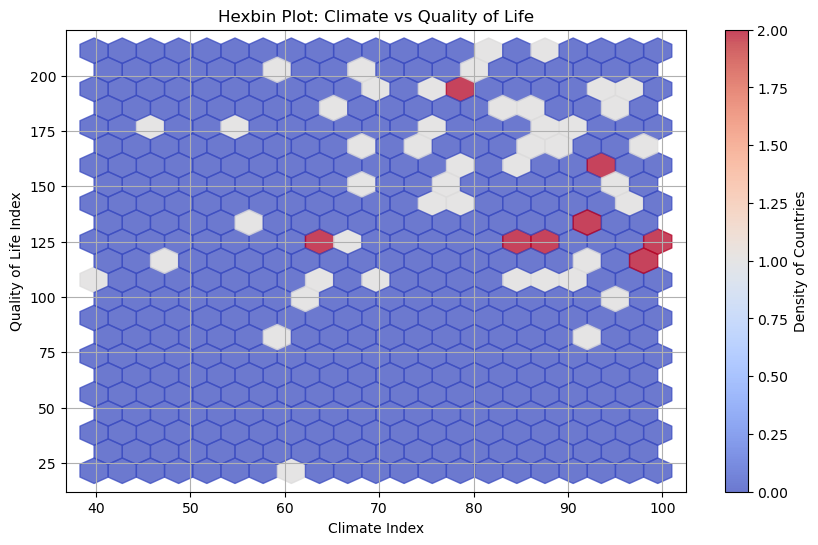

In [29]:
data = df[['Climate Index_quality_of_life_index', 'Quality of Life Index_quality_of_life_index']].dropna()

data.rename(columns={
    'Climate Index_quality_of_life_index': 'Climate Index',
    'Quality of Life Index_quality_of_life_index': 'Quality of Life Index'
}, inplace=True)

plt.figure(figsize=(10, 6))
plt.hexbin(
    data['Climate Index'], 
    data['Quality of Life Index'], 
    gridsize=20, cmap='coolwarm', alpha=0.75
)
plt.colorbar(label="Density of Countries")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life")
plt.grid(True)
plt.show()


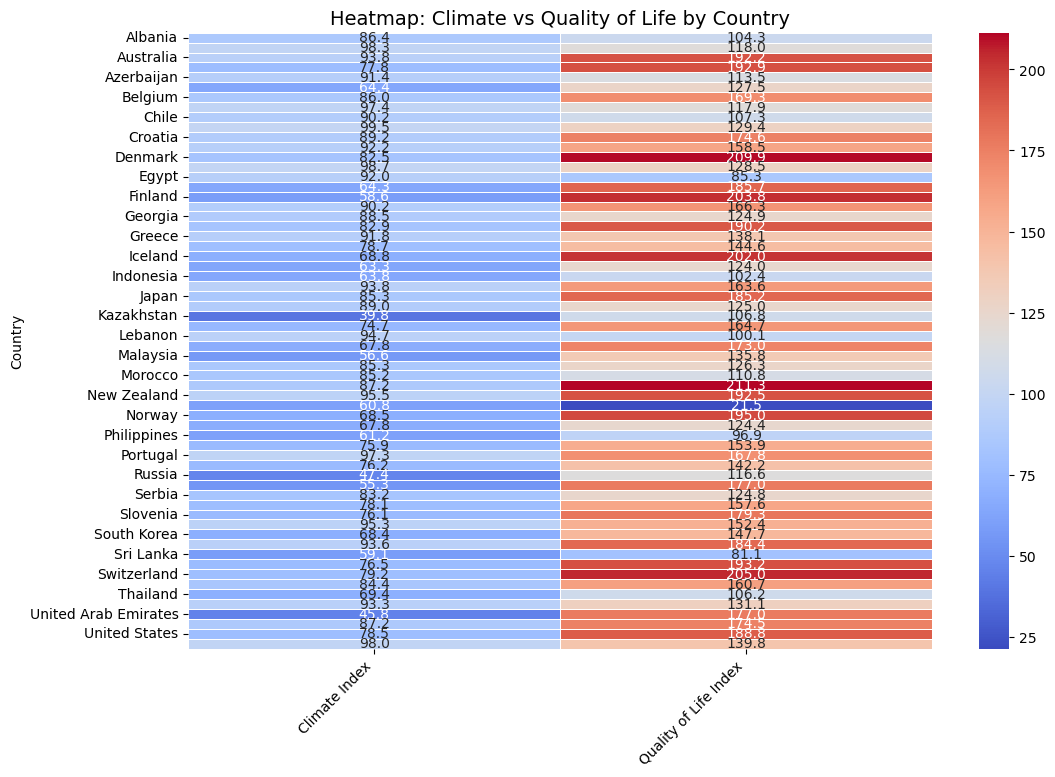

In [30]:
heatmap_data = df[['Country', 'Climate Index_quality_of_life_index', 'Quality of Life Index_quality_of_life_index']].dropna()

heatmap_data.rename(columns={
    'Climate Index_quality_of_life_index': 'Climate Index',
    'Quality of Life Index_quality_of_life_index': 'Quality of Life Index'
}, inplace=True)

heatmap_data.set_index('Country', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    cmap="coolwarm", 
    annot=True,  
    fmt=".1f",   
    linewidths=0.5
)

plt.title("Heatmap: Climate vs Quality of Life by Country", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


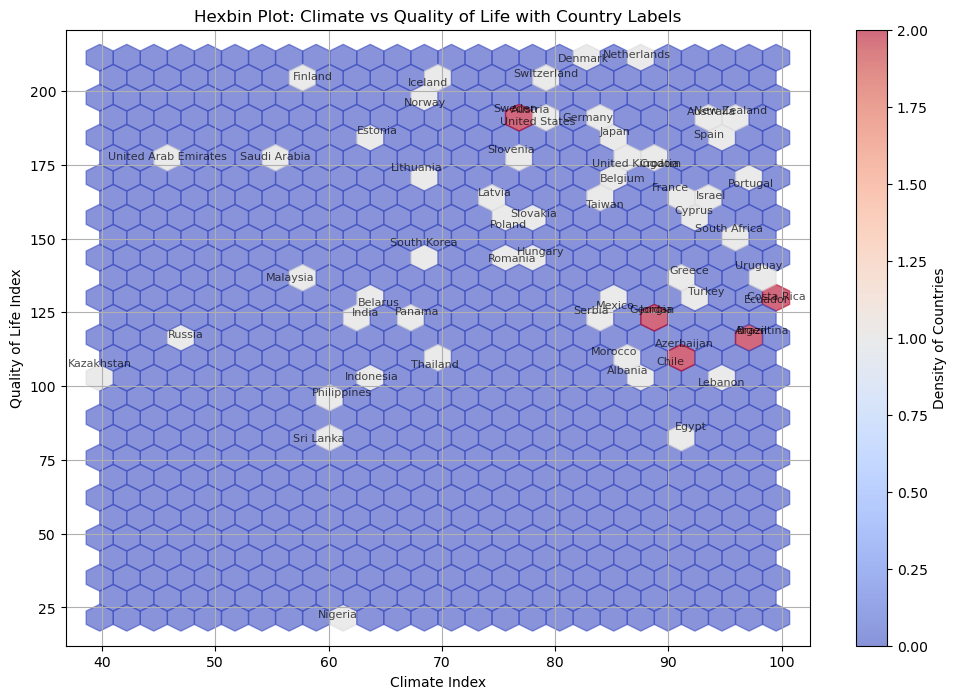

In [31]:
data = df[['Country', 'Climate Index_quality_of_life_index', 'Quality of Life Index_quality_of_life_index']].dropna()

data.rename(columns={
    'Climate Index_quality_of_life_index': 'Climate Index',
    'Quality of Life Index_quality_of_life_index': 'Quality of Life Index'
}, inplace=True)

plt.figure(figsize=(12, 8))
hb = plt.hexbin(
    data['Climate Index'], 
    data['Quality of Life Index'], 
    gridsize=25, cmap='coolwarm', alpha=0.6
)

for i, row in data.iterrows():
    plt.text(row['Climate Index'], row['Quality of Life Index'], row['Country'], fontsize=8, ha='center', alpha=0.7)

plt.colorbar(hb, label="Density of Countries")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life with Country Labels")
plt.grid(True)
plt.show()
